# 4장.오차수정하기 : 경사하강법,다중선형회귀

## 경사하강법

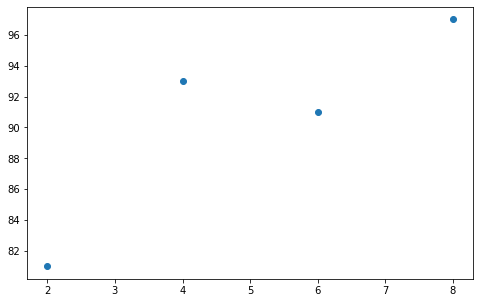

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#공부시간 X와 성적 Y의 리스트
data = [[2,81], [4,93], [6,91], [8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#그래프
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.show()

In [3]:
#x,y값을 넘파이 배열로 바꿈. 인덱스를 주어 하나씩 불러와 계산
x_data = np.array(x)
y_data = np.array(y)

#기울기 a와 절편 b의 값, 학습률 0.03으로 초기화
a = 0;b = 0;lr = 0.03
epochs = 2001 #반복 횟수

In [6]:
#경사하강법 시작
for i in range(epochs): #epochs수 만큼 반복
    y_hat = a * x_data + b  #y=ax+b
    error = y_data - y_hat  #오류 = 실제값 - 예측값
    a_diff = -(2/len(x_data)) * sum(x_data * (error)) #오차함수를 a 로 미분
    b_diff = -(2/len(x_data)) * sum(error) #오차함수를 b로 미분
    a = a - lr * a_diff #학습률을 곱해 기존의 a 값을 업데이트
    b = b - lr * b_diff #학습률을 곱히 기존의 b 값을 업데이트
    if i % 100 == 0:  #100번 반복될 때마다 현재의 a값, b값을 출력
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i,a,b))

epoch=0, 기울기=24.2622, 절편=1.0129
epoch=100, 기울기=7.3080, 절편=49.1147
epoch=200, 기울기=4.1841, 절편=67.7567
epoch=300, 기울기=3.0088, 절편=74.7701
epoch=400, 기울기=2.5667, 절편=77.4086
epoch=500, 기울기=2.4003, 절편=78.4013
epoch=600, 기울기=2.3377, 절편=78.7748
epoch=700, 기울기=2.3142, 절편=78.9153
epoch=800, 기울기=2.3053, 절편=78.9681
epoch=900, 기울기=2.3020, 절편=78.9880
epoch=1000, 기울기=2.3008, 절편=78.9955
epoch=1100, 기울기=2.3003, 절편=78.9983
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


* 기울기 2.3과 y절편 79에 수렴하는데 <br>
이는 앞서 우리가 3장 최소 제곱법을 통해 미리 확인한 값과 같습니다.

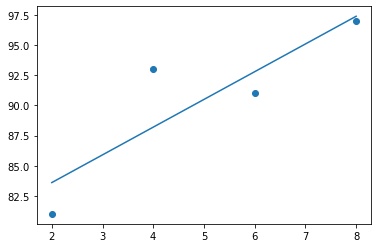

In [7]:
y_pred = a * x_data + b
plt.scatter(x,y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

## 다중선형회귀

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#공부시간 x1, 과외 x2, 성적 y의 리스트
data = [[2,0,81], [4,4,93], [6,2,91], [8,3,97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

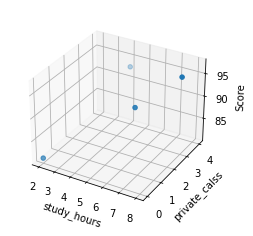

In [21]:
# 그래프로 확인
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_calss')
ax.set_zlabel('Score')
ax.dist = 11
ax.scatter(x1,x2,y)
plt.show()

In [26]:
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)
#기울기 a와 절편 b의 값을 초기화
a1 = 0;a2=0;b=0
#학습률
lr = 0.02 ; epochs = 2001
#경사 하강법
for i in range(epochs): #epoch수 만큼 반복
    y_pred = a1 * x1_data + a2 * x2_data + b
    error = y_data - y_pred
    a1_diff = -(2/len(x1_data)) * sum(x1_data * (error))
    a2_diff = -(2/len(x2_data)) * sum(x2_data * (error))
    b_new = -(2/len(x1_data)) * sum(y_data - y_pred)
    a1 = a1 - lr * a1_diff
    a2 = a2 - lr * a2_diff
    b = b - lr * b_new
    if i % 100 == 0:
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i,a1,a2,b))

epoch=0, 기울기1=18.5600, 기울기2=8.4500, 절편=3.6200
epoch=100, 기울기1=7.2994, 기울기2=4.2867, 절편=38.0427
epoch=200, 기울기1=4.5683, 기울기2=3.3451, 절편=56.7901
epoch=300, 기울기1=3.1235, 기울기2=2.8463, 절편=66.7100
epoch=400, 기울기1=2.3591, 기울기2=2.5823, 절편=71.9589
epoch=500, 기울기1=1.9546, 기울기2=2.4427, 절편=74.7362
epoch=600, 기울기1=1.7405, 기울기2=2.3688, 절편=76.2058
epoch=700, 기울기1=1.6273, 기울기2=2.3297, 절편=76.9833
epoch=800, 기울기1=1.5673, 기울기2=2.3090, 절편=77.3948
epoch=900, 기울기1=1.5356, 기울기2=2.2980, 절편=77.6125
epoch=1000, 기울기1=1.5189, 기울기2=2.2922, 절편=77.7277
epoch=1100, 기울기1=1.5100, 기울기2=2.2892, 절편=77.7886
epoch=1200, 기울기1=1.5053, 기울기2=2.2875, 절편=77.8209
epoch=1300, 기울기1=1.5028, 기울기2=2.2867, 절편=77.8380
epoch=1400, 기울기1=1.5015, 기울기2=2.2862, 절편=77.8470
epoch=1500, 기울기1=1.5008, 기울기2=2.2860, 절편=77.8518
epoch=1600, 기울기1=1.5004, 기울기2=2.2859, 절편=77.8543
epoch=1700, 기울기1=1.5002, 기울기2=2.2858, 절편=77.8556
epoch=1800, 기울기1=1.5001, 기울기2=2.2858, 절편=77.8563
epoch=1900, 기울기1=1.5001, 기울기2=2.2857, 절편=77.8567
epoch=2000, 기울기1=1.5000, 기울기2=2.